# マックスプーリング

In [7]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from common.util import im2col

## 簡単なデータでマックスプーリングをやってみる

### 入力データをつくる

In [8]:
img = np.array([[[[1,2,1,0],[0,1,2,3],[3,0,1,2],[2,4,0,1]]]])
img

array([[[[1, 2, 1, 0],
         [0, 1, 2, 3],
         [3, 0, 1, 2],
         [2, 4, 0, 1]]]])

### 配列をマックスプーリング用に変形する

In [9]:
col = im2col(img,2,2,stride=2,pad=0) # im2col関数については後ほど実装する
print(col.shape)
col

(4, 4)


array([[1., 2., 0., 1.],
       [1., 0., 2., 3.],
       [3., 0., 2., 4.],
       [1., 2., 0., 1.]])

### マックスプーリングの実行

In [10]:
out = np.max(col,axis=1)
out

array([2., 3., 4., 2.])

In [11]:
img_y = out.reshape(1,2,2,1).transpose(0,3,1,2)
img_y

array([[[[2., 3.],
         [4., 2.]]]])

## MINIST画像でマックスプーリングをやってみる

In [12]:
# Load the MNIST dataset
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(X_train, y_train),(X_test, y_test) = mnist.load_data()

from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

train = X_train/255
test = X_test/255
train = train.reshape(-1, 28*28)
test = test.reshape(-1, 28*28)

def show_image(img): 
    pil_img = Image.fromarray(img)
    plt.imshow(img)
    plt.gray()
    plt.show()
    return

### trainの1枚目を取り出す

label=[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.   

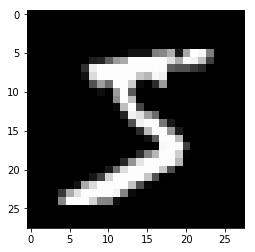

In [13]:
label = train[0]
img = train[0]
print("label=%s"%label)
img = img.reshape(28,28)
img = np.uint8(img*255)
show_image(img)

### 配列をマックスプーリング用に変形する

In [14]:
img = img.reshape(1,1,28,28)
col = im2col(img,3,3,stride=1,pad=0)
print(col.shape)
col

(676, 9)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### マックスプーリングの実行

In [15]:
out = np.max(col,axis=1)
out

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         3.,  18.,  18.,  18., 126., 136., 175., 175., 175., 255., 255.,
       255., 247., 127.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        30.,  36.,  94., 154., 170., 253., 253., 253., 253., 253., 253.,
       253., 253., 255., 255., 255., 247., 127.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,  49., 238., 253., 253., 253., 253., 253., 253.,
       253., 253., 253., 253., 253., 253., 255., 25

In [16]:
img_y = out.reshape(26,26)
img_y

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.,
         18.,  18.,  18., 126., 136., 175., 175., 175., 255., 255., 255.,
        247., 127.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,  30.,  36.,  94., 154., 170.,
        253., 253., 253., 253., 253., 253., 253., 253., 255., 255., 255.,
        247., 127.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,  49., 238., 253., 253., 253., 253.,
        253., 253., 2

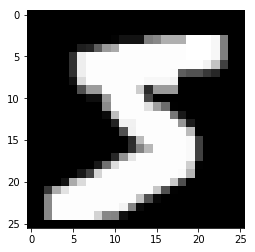

In [17]:
show_image(img_y)

## 他の写真でマックスプーリングを試してみる

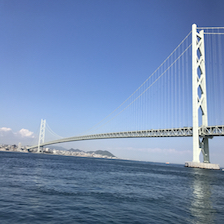

In [18]:
img_ = Image.open("../1_data/augmentor/original/bridge.jpg")
img_

In [19]:
img_ =  np.array(img_)
print("次元:",img_.shape)
img_

次元: (224, 224, 3)


array([[[ 88, 117, 175],
        [ 89, 118, 178],
        [ 92, 118, 177],
        ...,
        [ 63,  85, 135],
        [ 62,  84, 134],
        [ 63,  85, 135]],

       [[ 92, 116, 176],
        [ 92, 118, 177],
        [ 91, 117, 178],
        ...,
        [ 63,  85, 135],
        [ 63,  85, 135],
        [ 64,  86, 136]],

       [[ 92, 116, 178],
        [ 91, 117, 176],
        [ 91, 117, 176],
        ...,
        [ 64,  86, 133],
        [ 63,  85, 135],
        [ 63,  84, 137]],

       ...,

       [[ 75,  93, 115],
        [ 73,  91, 115],
        [ 65,  86, 107],
        ...,
        [ 69,  86, 106],
        [ 65,  84, 101],
        [ 64,  85, 104]],

       [[ 62,  80, 104],
        [ 64,  82, 106],
        [ 67,  88, 109],
        ...,
        [ 63,  82,  97],
        [ 64,  83, 100],
        [ 61,  78,  96]],

       [[ 58,  78, 102],
        [ 64,  84, 108],
        [ 71,  92, 113],
        ...,
        [ 64,  81,  99],
        [ 62,  79,  97],
        [ 61,  78,  96]]

In [20]:
img_ = img_.transpose(2,0,1)
print("次元:",img_.shape)
img_

次元: (3, 224, 224)


array([[[ 88,  89,  92, ...,  63,  62,  63],
        [ 92,  92,  91, ...,  63,  63,  64],
        [ 92,  91,  91, ...,  64,  63,  63],
        ...,
        [ 75,  73,  65, ...,  69,  65,  64],
        [ 62,  64,  67, ...,  63,  64,  61],
        [ 58,  64,  71, ...,  64,  62,  61]],

       [[117, 118, 118, ...,  85,  84,  85],
        [116, 118, 117, ...,  85,  85,  86],
        [116, 117, 117, ...,  86,  85,  84],
        ...,
        [ 93,  91,  86, ...,  86,  84,  85],
        [ 80,  82,  88, ...,  82,  83,  78],
        [ 78,  84,  92, ...,  81,  79,  78]],

       [[175, 178, 177, ..., 135, 134, 135],
        [176, 177, 178, ..., 135, 135, 136],
        [178, 176, 176, ..., 133, 135, 137],
        ...,
        [115, 115, 107, ..., 106, 101, 104],
        [104, 106, 109, ...,  97, 100,  96],
        [102, 108, 113, ...,  99,  97,  96]]], dtype=uint8)

### 配列をマックスプーリング用に変形する

In [21]:
col_ = im2col(img_.reshape(1,3,224,224),4,4,stride=4,pad=0)
print(col_.shape)
col_

(3136, 48)


array([[ 88.,  89.,  92., ..., 181., 182., 177.],
       [ 90.,  89.,  89., ..., 175., 176., 175.],
       [ 88.,  88.,  88., ..., 176., 175., 175.],
       ...,
       [ 82.,  61.,  51., ..., 103.,  99.,  93.],
       [ 62.,  68.,  74., ...,  94., 102., 101.],
       [ 64.,  67.,  60., ...,  99.,  97.,  96.]])

### チャンネル方向のデータが横に並んでいるので、縦に並べ替える
(3136, 48) = (3136, 16+16+16)  
↓  
(9408, 16) = (3136*3, 16)  

In [22]:
col_ = col_.reshape(-1,4*4)
print(col_.shape)
col_

(9408, 16)


array([[ 88.,  89.,  92., ...,  95.,  93.,  93.],
       [117., 118., 118., ..., 119., 118., 117.],
       [175., 178., 177., ..., 181., 182., 177.],
       ...,
       [ 64.,  67.,  60., ...,  64.,  62.,  61.],
       [ 79.,  86.,  79., ...,  81.,  79.,  78.],
       [100., 103.,  96., ...,  99.,  97.,  96.]])

### マックスプーリングの実行

In [23]:
out_ = np.max(col_,axis=1)
print(out_.shape)
out_

(9408,)


array([ 95., 119., 182., ...,  72.,  89., 107.])

(56, 56, 3)


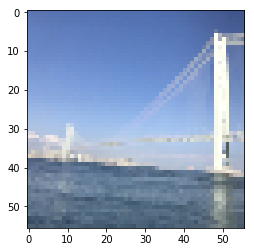

In [24]:
img_y = out_.reshape(56,56,3)
print(img_y.shape)
show_image(np.uint8(img_y))

## ウィンドウサイズを変えてみる

size=4


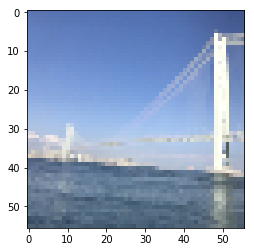

size=8


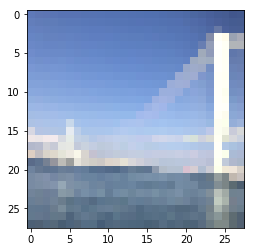

size=16


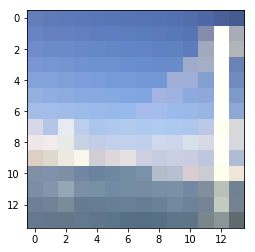

size=32


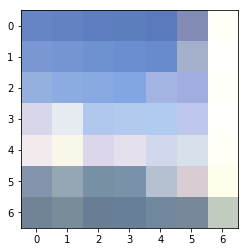

In [25]:
for size in [4,8,16,32]:
    print("size=%s"%size)
    col_ = im2col(img_.reshape(1,3,224,224),size,size,stride=size,pad=0)
    col_ = col_.reshape(-1,size*size)
    out_ = np.max(col_,axis=1)
    img_y = out_.reshape(int(224/size),int(224/size),3)
    show_image(np.uint8(img_y))

### [演習]
- 自分が持っている写真でマックスプーリングを試してみましょう。